In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn import model_selection

In [2]:
test_data = pd.read_csv("SalaryData_Test.csv")
train_data = pd.read_csv("SalaryData_Train.csv")

In [3]:
df = test_data.append(train_data)

C:\Users\Vishnu\AppData\Local\Temp\ipykernel_6972\1966257942.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = test_data.append(train_data)


In [4]:
test = test_data.copy()
train = train_data.copy()

In [5]:
test.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
5,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
6,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
7,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
8,65,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
9,36,Federal-gov,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


In [6]:
train.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [7]:
str_c = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [8]:
number = LabelEncoder()

In [9]:
for i in str_c:
    train[i]= number.fit_transform(train[i])
    test[i]=number.fit_transform(test[i])

In [10]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [11]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [12]:
mapping = {' >50K': 1, ' <=50K': 2}

In [13]:
train = train.replace({'Salary': mapping})
test = test.replace({'Salary': mapping})

In [16]:
df = train.append(test) 
import warnings
warnings.filterwarnings("ignore")

In [17]:
df1 = df.copy()

In [18]:
df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,2
1,50,4,9,13,2,3,0,4,1,0,0,13,37,2
2,38,2,11,9,0,5,1,4,1,0,0,40,37,2
3,53,2,1,7,2,5,0,2,1,0,0,40,37,2
4,28,2,9,13,2,9,5,2,0,0,0,40,4,2


In [19]:
df1.shape

(45221, 14)

In [20]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45221.0,38.548086,13.217981,17.0,28.0,37.0,47.0,90.0
workclass,45221.0,2.204507,0.958132,0.0,2.0,2.0,2.0,6.0
education,45221.0,10.313217,3.816992,0.0,9.0,11.0,12.0,15.0
educationno,45221.0,10.118463,2.552909,1.0,9.0,10.0,13.0,16.0
maritalstatus,45221.0,2.585148,1.500460,0.0,2.0,2.0,4.0,6.0
occupation,45221.0,5.969572,4.026444,0.0,2.0,6.0,9.0,13.0
relationship,45221.0,1.412684,1.597242,0.0,0.0,1.0,3.0,5.0
race,45221.0,3.680281,0.832361,0.0,4.0,4.0,4.0,4.0
sex,45221.0,0.675062,0.468357,0.0,0.0,1.0,1.0,1.0
capitalgain,45221.0,1101.454700,7506.511295,0.0,0.0,0.0,0.0,99999.0


In [21]:
df1.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [22]:
## Correlation
corr = df1.corr()

<AxesSubplot:>

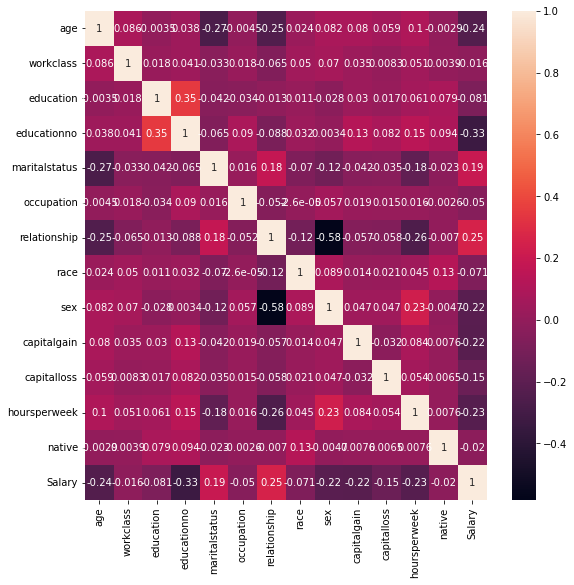

In [23]:
plt.figure(figsize=(9,9))
sns.heatmap(corr,annot=True)

In [32]:
plt.rcParams["figure.figsize"] = 9,5 

Skew: -0.31062061074424
Kurtosis: 0.6350448194491634


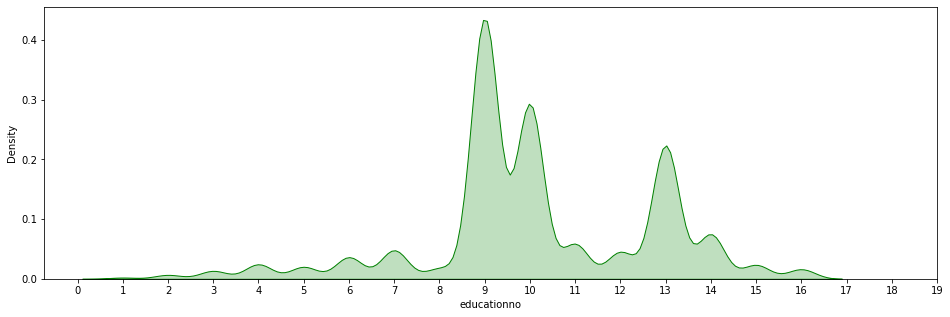

In [45]:
df1 = df1.reset_index()
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['educationno'].skew()))
print("Kurtosis: {}".format(df1['educationno'].kurtosis()))
ax = sns.kdeplot(df1['educationno'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

In [51]:
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

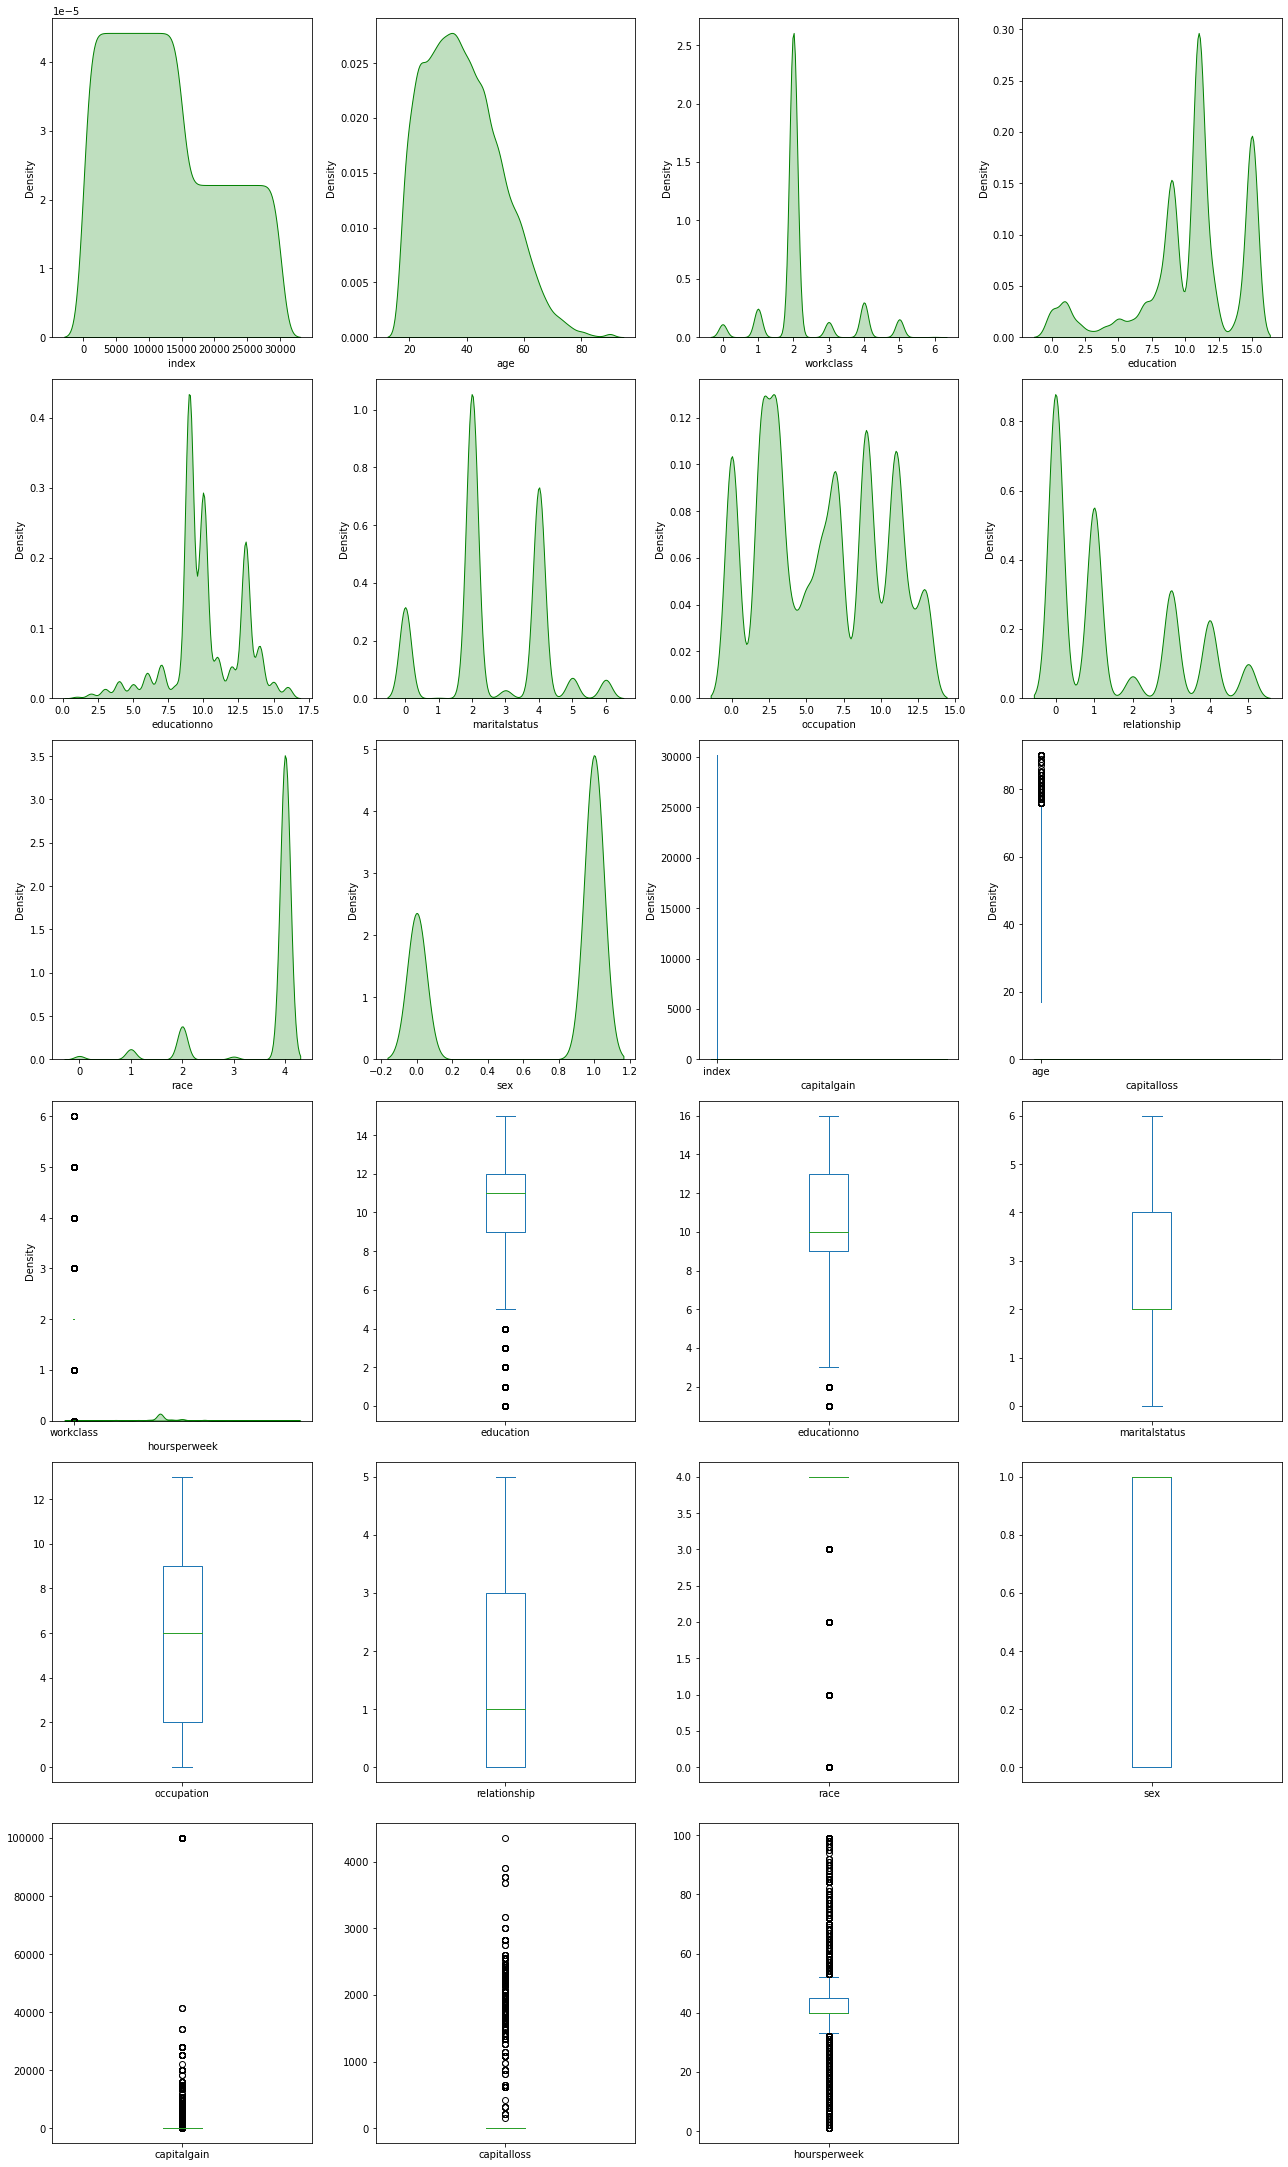

,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek
skewness,0.438900,0.532784,1.148931,-0.945666,-0.310621,-0.006760,0.107141,0.829192,-2.518388,-0.747594,11.788871,4.517536,0.340536
kurtosis,-0.883161,-0.155931,2.329983,0.773506,0.635045,-0.538981,-1.249883,-0.697095,5.350390,-1.441168,150.147899,19.376085,3.201287


In [52]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [53]:
# Naive bayes
x_train = train.iloc[:,0:13]
y_train = train.iloc[:,13]
x_test = test.iloc[:,0:13]
y_test = test.iloc[:,13]

In [54]:
## gaussainNB
clsfrgnb = GaussianNB()

In [55]:
clsfrgnb.fit(x_train, y_train)

GaussianNB()

In [56]:
y_pred_gnb = clsfrgnb.predict(x_test)

In [57]:
confusion_matrix(y_test, y_pred_gnb)

array([[ 1209,  2491],
       [  601, 10759]], dtype=int64)

In [58]:
pd.crosstab(y_test.values.flatten(),clsfrgnb)

col_0,GaussianNB()
row_0,
1,3700
2,11360


In [59]:
print ("Accuracy",np.mean(y_pred_gnb==y_test.values.flatten()))

Accuracy 0.7946879150066402


In [60]:
## MultinomialNB
clsfrmnb = MultinomialNB()

In [61]:
clsfrmnb.fit(x_train, y_train)

MultinomialNB()

In [62]:
y_pred_mnb = clsfrmnb.predict(x_test)

In [63]:
confusion_matrix(y_test, y_pred_mnb)

array([[  780,  2920],
       [  469, 10891]], dtype=int64)

In [64]:
pd.crosstab(y_test.values.flatten(),clsfrmnb)

col_0,MultinomialNB()
row_0,
1,3700
2,11360


In [65]:
print ("Accuracy",np.mean(y_pred_mnb==y_test.values.flatten()))

Accuracy 0.7749667994687915


In [66]:
## cross validate the model with other classifires
seed = 7

In [67]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [68]:
results = []
names = []
scoring = 'accuracy'

In [70]:
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=None)
	cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.801499 (0.006037)
LDA: 0.810650 (0.008475)
KNN: 0.833759 (0.005387)
CART: 0.807069 (0.004142)
NB: 0.795498 (0.006570)


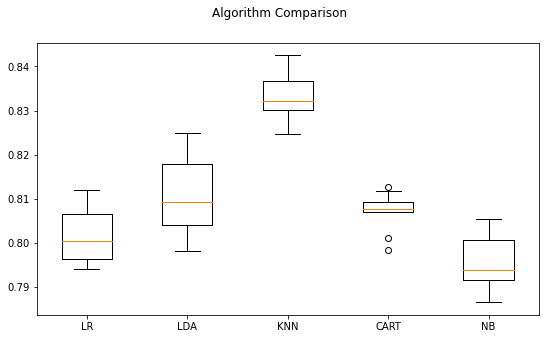

In [71]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [73]:
print("In comparision with other models , KNN has the best accuracy value.")

In comparision with other models , KNN has the best accuracy value.
